In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/distweetrhinosceros/__results__.html
/kaggle/input/distweetrhinosceros/submission.csv
/kaggle/input/distweetrhinosceros/__notebook__.ipynb
/kaggle/input/distweetrhinosceros/__output__.json
/kaggle/input/distweetrhinosceros/custom.css
/kaggle/input/distweetrhinosceros/__results___files/__results___8_0.png
/kaggle/input/distweetrhinosceros/__results___files/__results___9_0.png
/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
train = pd.read_csv("../input/nlp-getting-started/train.csv")
test = pd.read_csv("../input/nlp-getting-started/test.csv")
X_train = train.iloc[:, :4]
y_train = train.iloc[:, 4]
X_test = test
print(X_train.shape, y_train.shape, X_test.shape)

(7613, 4) (7613,) (3263, 4)


In [3]:
def lowercase_text(text):
    return text.lower()

X_train.text=X_train.text.apply(lambda x: lowercase_text(x))
X_test.text=X_test.text.apply(lambda x: lowercase_text(x))
X_train.head()

,id,keyword,location,text
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...
1,4,NaN,NaN,forest fire near la ronge sask. canada
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...


In [4]:
import re
import string
def remove_noise(text):
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('ûò', '', text)
    return text
X_train.text=X_train.text.apply(lambda x: remove_noise(x))
X_test.text=X_test.text.apply(lambda x: remove_noise(x))
X_train.head()

,id,keyword,location,text
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,forest fire near la ronge sask canada
2,5,NaN,NaN,all residents asked to shelter in place are be...
3,6,NaN,NaN,people receive wildfires evacuation orders in...
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...


In [5]:
# Tokenizing the training and the test set
import nltk
from nltk.corpus import stopwords
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
X_train['text'] = X_train['text'].apply(lambda x: tokenizer.tokenize(x))
X_test['text'] = X_test['text'].apply(lambda x: tokenizer.tokenize(x))
X_train['text'].head()

0    [our, deeds, are, the, reason, of, this, earth...
1        [forest, fire, near, la, ronge, sask, canada]
2    [all, residents, asked, to, shelter, in, place...
3    [people, receive, wildfires, evacuation, order...
4    [just, got, sent, this, photo, from, ruby, ala...
Name: text, dtype: object

In [6]:
# Removing stopwords belonging to english language
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

X_train['text'] = X_train['text'].apply(lambda x : remove_stopwords(x))
X_test['text'] = X_test['text'].apply(lambda x : remove_stopwords(x))
X_train.head()

,id,keyword,location,text
0,1,NaN,NaN,"[deeds, reason, earthquake, may, allah, forgiv..."
1,4,NaN,NaN,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,"[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,"[people, receive, wildfires, evacuation, order..."
4,7,NaN,NaN,"[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [7]:
# After preprocessing, the text format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

X_train['text'] = X_train['text'].apply(lambda x : combine_text(x))
X_test['text'] = X_test['text'].apply(lambda x : combine_text(x))
# X_train['text']
X_train.head()

,id,keyword,location,text
0,1,NaN,NaN,deeds reason earthquake may allah forgive us
1,4,NaN,NaN,forest fire near la ronge sask canada
2,5,NaN,NaN,residents asked shelter place notified officer...
3,6,NaN,NaN,people receive wildfires evacuation orders cal...
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...


In [8]:
# Stemming
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

def stemming(text):
    text = [stemmer.stem(word) for word in text.split()]
    return ' '.join(text)

#X_train['text'] = X_train['text'].apply(lambda x : stemming(x))
#X_test['text'] = X_test['text'].apply(lambda x : stemming(x))
#X_train

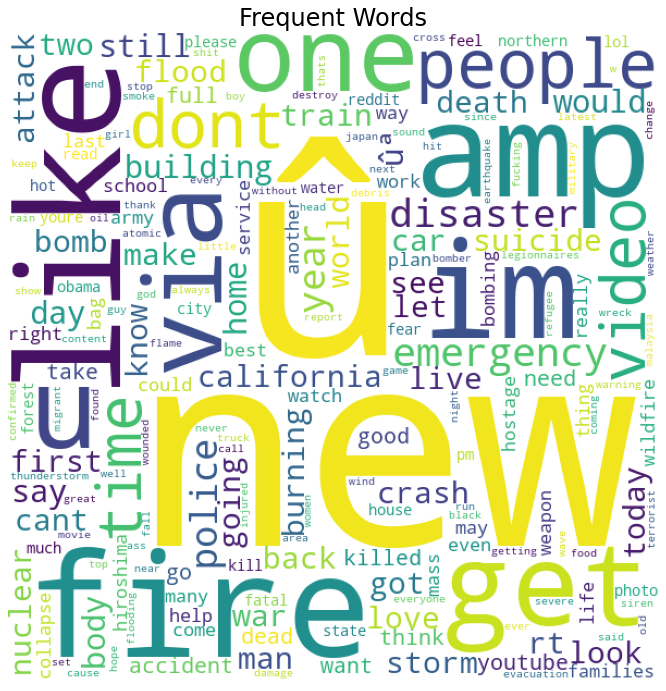

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
def wordsCloud (dF):
    fig , ax1 = plt.subplots(1,figsize=(12,12))
    stopword_list = stopwords.words("english")
    wordcloud=WordCloud(stopwords = stopword_list, background_color='white',collocations = False , width=600,height=600).generate(" ".join(dF))
    ax1.imshow(wordcloud)
    ax1.axis('off')
    ax1.set_title("Frequent Words",fontsize=24)    
    # print(stopword_list)
    return
wordsCloud(X_train.text)

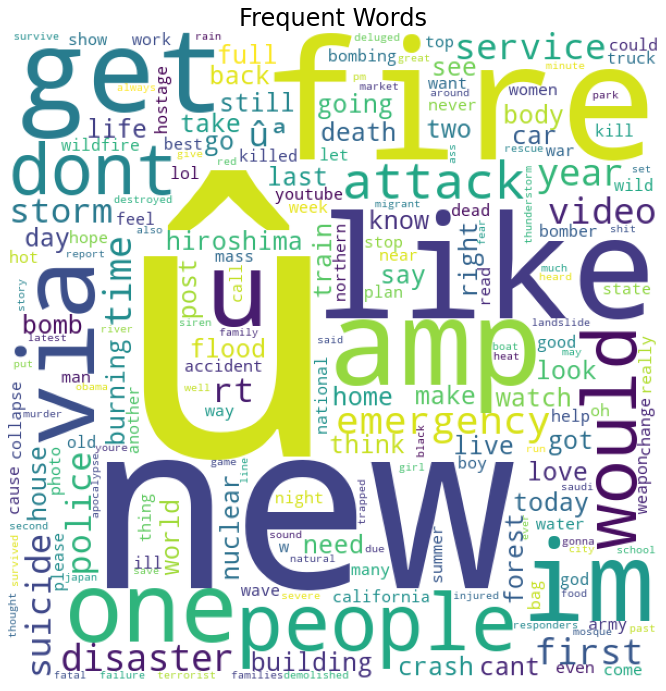

In [10]:
wordsCloud(X_test.text)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer=CountVectorizer() # analyzer='word', stop_words = "english"
train_vec = count_vectorizer.fit_transform(X_train.text)
test_vec = count_vectorizer.transform(X_test.text)

from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_vectorizer = TfidfVectorizer() # min_df=2, max_df=0.5, ngram_range=(1, 2)analyzer='word', stop_words = "english"analyzer='word', stop_words='english'# , ngram_range=(1, 2), lowercase=True, max_features=150000
train_tfidf = Tfidf_vectorizer.fit_transform(X_train.text)
test_tfidf = Tfidf_vectorizer.transform(X_test.text)

print("train_vec" ,train_vec[7].todense())
print("test_vec", test_vec[7].todense())

print("train_tfidf" ,train_tfidf[7].todense())
print("test_tfidf", test_vec[7].todense())

train_vec [[0 0 0 ... 0 0 0]]
test_vec [[0 0 0 ... 0 0 0]]
train_tfidf [[0. 0. 0. ... 0. 0. 0.]]
test_tfidf [[0 0 0 ... 0 0 0]]


In [12]:
from sklearn.model_selection import KFold
kF = KFold(shuffle=True, random_state=241)      # разделение на 5 выборок
# MultinomialNB
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB() 
scores = model_selection.cross_val_score(clf,train_vec,y_train,cv=kF,scoring='f1')
print("MultinomialNB score: " ,scores.mean())

# LogisticRegression
from sklearn.linear_model import LogisticRegression
clf_tfidf = LogisticRegression()
scores_tfidf = model_selection.cross_val_score(clf_tfidf,train_tfidf,y_train,
                                               cv=kF,scoring='f1')
print("LogisticRegretion score: " ,scores_tfidf.mean())

# SVC
from sklearn.svm import SVC   # реализация метода опорных векторов
clf_svc = SVC()#kernel='linear', random_state=241
scores_svc = model_selection.cross_val_score(clf_svc,train_tfidf,y_train,
                                               cv=kF,scoring='f1')
print("SVC score: " ,scores_svc.mean())

# XGBoost
import xgboost as xgb
clf_xgb_TFIDF = xgb.XGBClassifier()#max_depth=7, n_estimators=150, colsample_bytree=0.8, 
                        #subsample=0.8, nthread=10, learning_rate=0.1
scores_xgb = model_selection.cross_val_score(clf_xgb_TFIDF, train_tfidf, y_train, cv=kF, scoring="f1")
print("XGBost score: " ,scores_xgb.mean())



MultinomialNB score:  0.7527848332121476
LogisticRegretion score:  0.7350359633077094
SVC score:  0.7228168990630617
XGBost score:  0.6959838648408073


In [13]:
# MultinomialNB
clf.fit(train_vec,y_train)
y_pred = clf.predict(test_vec)
scores = model_selection.cross_val_score(clf,test_vec,y_pred,cv=kF,scoring='f1')
print("MultinomialNB prediction score: " ,scores.mean())

# LogisticRegression
clf_tfidf.fit(train_tfidf, y_train)
y_pred_tfidf = clf_tfidf.predict(test_tfidf)
scores_tfidf = model_selection.cross_val_score(clf_tfidf,test_tfidf,y_pred_tfidf,cv=kF,
                                         scoring='f1')
print("LogisticRegretion prediction score: " ,scores_tfidf.mean())

# SVC
clf_svc.fit(train_tfidf, y_train)
y_pred_svc = clf_svc.predict(test_tfidf)
scores_svc = model_selection.cross_val_score(clf_svc,test_tfidf,y_pred_svc, cv=kF,
                                         scoring='f1')  
print("SVC prediction score: " ,scores_svc.mean())

# XGBoost
clf_xgb_TFIDF.fit(train_tfidf, y_train)
y_pred_xgb = clf_xgb_TFIDF.predict(test_tfidf)
scores_xgb = model_selection.cross_val_score(clf_xgb_TFIDF,test_tfidf,y_pred_xgb, cv=kF,
                                         scoring='f1')  
print("XGBoosting prediction score: " ,scores_xgb.mean())

MultinomialNB prediction score:  0.8505447393740001
LogisticRegretion prediction score:  0.7264050095428602
SVC prediction score:  0.7936154282243236
XGBoosting prediction score:  0.8618639735239328


In [14]:
def submission(submission_file_path,model,test_vectors):
    sample_submission = pd.read_csv(submission_file_path)
    sample_submission["target"] = model.predict(test_vectors)
    sample_submission.to_csv("submission.csv", index=False)

In [15]:
submission_file_path = "../input/nlp-getting-started/sample_submission.csv"
test_vectors=test_tfidf
clf = clf_xgb_TFIDF
submission(submission_file_path,clf,test_vectors)